# DSCI 6008 4.4 Bayesian Regression

In the past, you have learned linear regression based on the ML estimate, this being the traditional Moore-Penrose pseudoinverse:

$$\hat{\beta} = ({\bf{X^{T}X}})^{-1}{\bf{X^{T}y}}$$

However, as you well know the OLS estimate is prone to overfitting. 
Supppose you needed to make an investment decision based on a linear regression but needed to weight the amount of money you intend to invest based on your uncertainty in the estimate (this is standard). In this case you will need to some create a MAP estimate for your regression, and here we enter bayesian regression.

## Bayesian regression


Suppose you are attempting to model a linear signal $y$ s.t.

$$y = \beta{\bf{x}} + {\bf{e}}$$

This is the familiar regression model. However, in this case, we will consider the idea that the error vector ${\bf{e}}$ is a gaussian distribution with a mean around 0. Note that the variance term $\sigma^{2}$ is a covariance matrix:

$${\bf{e}} \sim N(0, \sigma^{2})$$

By now we have covered enough of these problems so that you should recognize how to form the posterior for this problem:

$$p(y |\ {\bf{x}}, \beta, \sigma^{2}) \sim N({\beta\bf{x}}, \sigma^{2})$$

This is a response signal with a linear mean and a variance of magnitude $\sigma$. Now we consider the collection of data $Y=y_{i}$ paired with $X=x_{i}$, so as to make a reorderable collection of pairs $(y_{i},x_{i})$ 

$$p({\bf{Y}} |\ {\bf{X}}, \beta, V) = \Pi_{i}p(y_{i}|\ x_{i},\beta,\sigma^{2})$$

Note that this is the product of independent probabilities. We can reform this equation in matrix form:


$$ = \dfrac{1}{(\sigma^{2})^{\frac{N}{2}}}\text{exp}\left(-\frac{1}{2\sigma^{2}}({\bf{Y}}-\beta{\bf{X}})({\bf{Y}}-\beta{\bf{X}})^{T}\right) $$


## Formation of the conjugate prior: The matrix-normal density

Right now, our information about $\beta$ is really vague. Rewriting an estimator for the term inside the exponential function above using the OLS (Moore-Penrose) pseudoinverse:

$$\hat{\beta} = ({\bf{X^{T}X}})^{-1}{\bf{X^{T}y}}$$

gives us the following expansion which is normal with respect to the error in estimate for $\beta$, $(\beta-\hat{\beta})$:

$$({\bf{Y}}-\beta{\bf{X}})({\bf{Y}}-\beta{\bf{X}})^{T} = ({\bf{y-\hat{\beta}X}})^{T}({\bf{y-\hat{\beta}X}})+(\beta-\hat{\beta})^{T}({\bf{X^{T}X}})(\beta-\hat{\beta})$$

Now we can rewrite the likelihood:

$$p({\bf{y}}|{\bf{X}},\beta,\sigma^{2}) \propto (\sigma^2)^{-\frac{v}{2}} \exp\left(-\frac{vs^{2}}{2{\sigma}^{2}}\right)(\sigma^2)^{-\frac{n-v}{2}} \exp\left(-\frac{1}{2{\sigma}^{2}}(\beta - \hat{\beta})^{\rm T}({\bf{X}}^{T}{\bf{X}})(\beta - \hat{\beta})\right)$$

Given that

$$vs^{2} =(\mathbf{y}- \hat{\beta}\mathbf{X} )^{\rm T}(\mathbf{y}- \hat{\beta}\mathbf{X} ) \quad  \text{ and } \quad v = n-k$$

where $k$ is the number of regression coefficients.


This suggests a form for the prior:

$$p(\beta,\sigma^{2}) = p(\beta|\sigma^{2})p(\sigma^{2})$$

The conditional prior must be matrix-normal:

$$p(\beta|\sigma^{2}) \propto (\sigma^2)^{-\frac{k}{2}} \exp\left(-\frac{1}{2{\sigma}^{2}}(\beta - \mu_0)^{\rm T} \mathbf{\Lambda}_0 (\beta - \mu_0)\right)$$

Where the $\Lambda_{0}$ is a matrix of variance magnitudes (what does this remind you of)

And $p(\sigma^{2})$ is an [inverse gamma distribution](https://en.wikipedia.org/wiki/Inverse-gamma_distribution):

$$p(\sigma^{2}) \propto \dfrac{1}{(\sigma^2)^{\frac{v_{0}}{2}+1}} \exp\left(-\frac{v_{0}s_{0}^{2}}{2{\sigma}^{2}}\right)$$

In simple notation, we'd write this as the matrix normal: $N(\mu_{0}, \sigma^{2}\Lambda_{0}^{-1})$

## Calculation of the Posterior (Evidence) for the model

Using the simplifications:

$a_0=\tfrac{v_0}{2}$ and $b_0=\tfrac{1}{2}v_0s_0^2 $ with $v_{0}$ and $s_{0}^{2}$ as the prior values of $v$ and $s^{2}$, respectively. We can write the posterior as follows:

$$p(\beta,\sigma^{2}|\mathbf{y},\mathbf{X}) \propto p(\mathbf{y}|\mathbf{X},\beta,\sigma^{2})p(\beta|\sigma^{2})p(\sigma^{2}) $$

$$\propto \dfrac{1}{(\sigma^{2})^{\frac{n}{2}}}\exp\left(-\frac{1}{2{\sigma}^{2}}(\mathbf{y}- \mathbf{X}\beta)^{\rm T}(\mathbf{y}- \mathbf{X}\beta)\right) \dfrac{1}{(\sigma^{2})^{\frac{k}{2}}}\exp\left(-\frac{1}{2{\sigma}^{2}}(\beta -\mu_0)^{\rm T} \boldsymbol\Lambda_0 (\beta - \mu_0)\right)  \dfrac{1}{(\sigma^2)^{a_0+1}} \exp\left(-\frac{b_0}{{\sigma}^{2}}\right)$$

With some re-arrangement, the posterior can be re-written so that the posterior mean $\mu_n$ of the parameter vector $\beta$ can be expressed in terms of the least squares estimator $\hat{\beta}$ and the prior **coefficient** mean $\mu_0$, with the strength of the prior indicated by the prior matrix of variances $\Lambda_0$

To justify that $\mu_n$ is indeed the posterior **coefficient** mean, the quadratic terms in the exponential can be re-arranged in [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form) about $\beta-\mu_n$.

$(\mathbf{y}- \mathbf{X} \beta)^{\rm T}(\mathbf{y}- \mathbf{X} \beta) + (\beta - \mu_0)^{\rm T}\boldsymbol\Lambda_0(\beta - \mu_0) =(\beta - \mu_n)^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)(\beta - \mu_n)+\mathbf{y}^{\rm T}\mathbf{y}-\mu_n^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)\mu_n+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0$

Now we can rewrite the posterior as a normal multiplied by an inverse-gamma distribution with different coefficients:

$p(\beta,\sigma^{2}|\mathbf{y},\mathbf{X}) \propto \dfrac{1}{(\sigma^2)^{\frac{k}{2}}}\exp\left(-\dfrac{1}{2{\sigma}^{2}}(\beta - \mu_n)^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\mathbf{\Lambda}_0)(\beta - \mu_n)\right) \dfrac{1}{(\sigma^2)^{\frac{n+2a_{0}}{2}+1}}\exp\left(-\dfrac{2 b_0+\mathbf{y}^{\rm T}\mathbf{y}-\mu_n^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)\mu_n+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0}{2{\sigma}^{2}}\right)$

This can be interpreted as Bayesian learning where the parameters are updated according to the following equations.

$ \mu_n=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)^{-1} (\boldsymbol\Lambda_0\mu_0+\mathbf{X}^{\rm T}\mathbf{X}\hat{\beta})=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)^{-1} (\boldsymbol\Lambda_0\mu_0+\mathbf{X}^{\rm T}\mathbf{y})$

$\boldsymbol\Lambda_n=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)$

$a_n= a_0 + \frac{n}{2}$

$b_n= b_0 + \frac{1}{2}(\mathbf{y}^{\rm T}\mathbf{y}+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0-\mu_n^{\rm T}\boldsymbol\Lambda_n\mu_n) $

These can be solved with Bayesian updating.

The special case $\mu_0=0$, $\mathbf{\Lambda}_0 = c\mathbf{I}$ is called [(Bayesian) ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization). 

## Producing a solution to the above math


It's not difficult to see that the above model is difficult to interpret for the purpose of writing an optimization, so we are going to make some substitutions at this point to reduce the pain of finding an actual solution with a computer.

There are a few different ways of getting clear solutions. 

### The de facto MAP estimate

For simple cases, we can make a computation directly that closely resembles the OLS estimate of $\hat{\beta}$.

Starting with an *a priori* estimate of $\boldsymbol \Lambda_{0}$ (this is a diagonal matrix with the inverse of each $\lambda_{0}^{i}$ positioned on the diagonal) and $\sigma^{2}$, we can construct the posterior directly:

$\boldsymbol \Lambda_{0} = \begin{bmatrix}
                    \frac{1}{\lambda_{1}} & 0 & \cdots & 0 \\ 
                    0 & \frac{1}{\lambda_{2}} & \cdots & 0 \\
\vdots & \cdots & \cdots & \cdots \\
0 & 0 & \cdots & \frac{1}{\lambda_{n}}
                    \end{bmatrix}$


$\beta_{0} = \sigma^{2}\boldsymbol\Lambda_{0}\mu_{0}$

An estimate of beta is formed from the above equations

$\hat{\beta_{n}} = \mu_{n} = (\mathbf{X}^{\rm T}\mathbf{X}+\sigma^{2}\boldsymbol\Lambda_{0})^{-1}(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0})$

To make a prediction $\hat{y}$, we just use the math above:

$\hat{y} = \boldsymbol X \hat{\beta_{n}}$

### The Objective Estimate

In professional settings, the above estimate is not often computed, and rather a computationally simpler method is used altogether.

We instead make the following simplifications. First recalling back to your linear algebra, it should be obvious to you that $\boldsymbol \Lambda_{0}$ is a description of variance. It should also be further understood that the observed quantities ${\bf{X}}$  (the actual data) are actually the **posterior**. We can estimate these with a QR decomposition:

${\bf X} = {\bf QR}$

$({\bf{X}^{\rm T}X} + \sigma^{2} \boldsymbol \Lambda_{0})^{-1} \sim ({\bf{X}^{\rm T}X})^{-1} = ({\bf{QR}^{\rm T}QR})^{-1} = ({\bf{R}^{\rm T}{Q}^{\rm T}QR})^{-1} = ({\bf{R}^{\rm T}R})^{-1} = {\bf R}^{\rm -1}(\bf R^{\rm T})^{-1} $

$(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0}) \sim \mathbf{X}^{\rm T}\mathbf{y} = {\bf R^{\rm T}Q^{\rm T}}\bf y$


$\hat{\beta_{n}} = \mu_{n} = (\mathbf{X}^{\rm T}\mathbf{X}+\sigma^{2}\boldsymbol\Lambda_{0})^{-1}(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0}) ={\bf R^{-1}Q^{\rm T}y}$


[[ 26.01204318]
 [  3.24416574]]


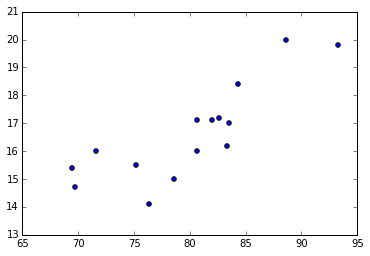

In [6]:
chirps = [20., 16., 19.8, 18.4, 17.1, 15.5,14.7,17.1,15.4,16.2, 15., 17.2, 16., 17., 14.1]
temp = [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82., 69.4, 83.3, 78.6, 82.6, 80.6, 83.5, 76.3]
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

# now try to predict chirps with temp

plt.scatter(temp, chirps)
x = np.expand_dims(chirps,axis=1)
ones = np.ones(shape=(len(chirps),1))
X = np.hstack((ones,x)) #this is your design matrix
n = X.shape[0]
k = X.shape[1]
y = np.expand_dims(temp, axis=1)

Q, R = np.linalg.qr(X)
RInv = np.linalg.inv(R)
RtInv = np.linalg.inv(R.T)
V_beta = RInv.dot(RtInv)
Beta_hat = RInv.dot(Q.T.dot(y))
df = n-k 
e=y-X.dot(Beta_hat) # error vector = difference in predictions
s2 = np.sum(e.T.dot(e))/df # sum of squared errors!

# Now we produce a simulation of the posterior values of the weights

n_sims = 100000
sigma = np.reshape(np.sqrt(st.invgamma.rvs(a=df/2.,scale=1./(df*s2/2.), size=n_sims)),(-1,1))
B_sims = np.repeat(Beta_hat.T,n_sims,axis=0)+sigma*np.random.multivariate_normal(mean=np.zeros(2),cov=V_beta,size=(n_sims,))
print(Beta_hat)

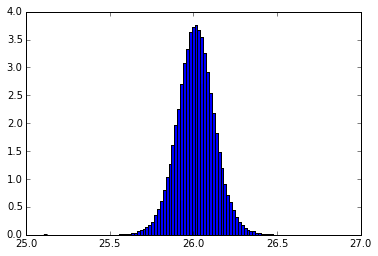

In [4]:
B0_hist = plt.hist((B_sims[:,0]),bins=100,normed=True);


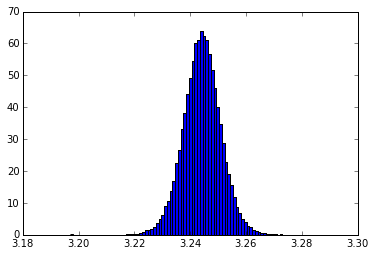

In [5]:
B1_hist = plt.hist((B_sims[:,1]),bins=100,normed=True);

Naturally, these estimates can be used to predict credibility intervals for the values of $\beta$, and can also be used to create credibility envelopes for the the prediction (by taking the values at the edges of the credibility and using these to plot the edges of the envelope).

## Other types of regressions - 

There are literally dozens of types of regressions that use a MAP estimate but different types of models of noise and stochasiticity in variables. These fall under the aegis of **Generalized Linear Models**. We will consider these later.